In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import SVD, accuracy

In [172]:
data = pd.read_csv('ratings.csv')

In [173]:
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [174]:
data.rating.value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

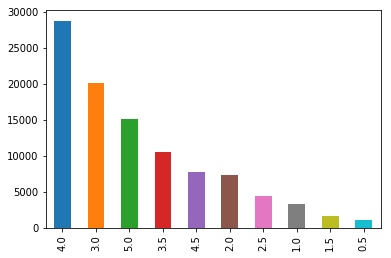

In [175]:
data.rating.value_counts().plot(kind='bar')
plt.show()

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [177]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [178]:
data = data[['userId', 'movieId', 'rating', 'timestamp']]


In [179]:
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [180]:
data = data.iloc[:, :-1]

In [181]:
data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [182]:
reader = Reader()
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [183]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)


In [184]:
# We'll use the SVD algorithm.
algo = SVD()
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [185]:
predictions = algo.test(testset)

In [186]:
accuracy.rmse(predictions)


RMSE: 0.9020


0.9020170071884935